# Reading the data

In [4]:
import pandas as pd

path="https://raw.githubusercontent.com/rktrojan/DataSciencePython/main/DataFiles/insurance.csv"

df = pd.read_csv(path)


In [5]:

df


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


# Feature Engineering

In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [8]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [9]:
df[df.expenses==1639.56]

,age,sex,bmi,children,smoker,region,expenses
195,19,male,30.6,0,no,northwest,1639.56
581,19,male,30.6,0,no,northwest,1639.56


In [10]:
cleaned_df = df.drop_duplicates()

In [11]:
cleaned_df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [12]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [13]:
cleaned_df.corr()


,age,bmi,children,expenses
age,1.000000,0.109414,0.041536,0.298308
bmi,0.109414,1.000000,0.012641,0.198637
children,0.041536,0.012641,1.000000,0.067389
expenses,0.298308,0.198637,0.067389,1.000000


In [14]:
cleaned_df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


# DATA ENCODING

In [15]:

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder


le = LabelEncoder()


In [16]:
le.fit(cleaned_df.region)

le.classes_

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [17]:
le.transform(cleaned_df.region)

array([3, 2, 2, ..., 2, 3, 1])

In [18]:

cleaned_df["sex_enc"] = le.fit_transform(cleaned_df.sex)


C:\Users\admin\AppData\Local\Temp/ipykernel_20264/2217867192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["sex_enc"] = le.fit_transform(cleaned_df.sex)


In [19]:

cleaned_df["smoker_enc"] = le.fit_transform(cleaned_df.smoker)

cleaned_df["region_enc"] = le.fit_transform(cleaned_df.region)



C:\Users\admin\AppData\Local\Temp/ipykernel_20264/2996052514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["smoker_enc"] = le.fit_transform(cleaned_df.smoker)
C:\Users\admin\AppData\Local\Temp/ipykernel_20264/2996052514.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["region_enc"] = le.fit_transform(cleaned_df.region)


In [20]:
cleaned_df

#forward selection

#backward selection

cleaned_df.sort_values("region")

,age,sex,bmi,children,smoker,region,expenses,sex_enc,smoker_enc,region_enc
394,46,female,32.3,2,no,northeast,9411.01,0,0,0
282,30,male,27.6,1,no,northeast,4237.13,1,0,0
281,54,male,40.6,3,yes,northeast,48549.18,1,1,0
280,40,female,28.1,1,yes,northeast,22331.57,0,1,0
942,18,female,40.2,0,no,northeast,2217.47,0,0,0
...,...,...,...,...,...,...,...,...,...,...
487,19,male,28.7,0,no,southwest,1253.94,1,0,3
490,19,female,32.9,0,no,southwest,1748.77,0,0,3
493,61,male,43.4,0,no,southwest,12574.05,1,0,3
472,19,female,29.8,0,no,southwest,1744.47,0,0,3


In [21]:
encoded_df = cleaned_df.drop(["sex","smoker","region"], axis=1) 

In [22]:
encoded_df.expenses/63770.43


0       0.264777
1       0.027059
2       0.069773
3       0.344744
4       0.060637
          ...   
1333    0.166230
1334    0.034593
1335    0.025558
1336    0.031487
1337    0.456973
Name: expenses, Length: 1337, dtype: float64

# DATA SCALING :::::::::::::::


#### MANUAL SCALING


In [23]:

encoded_df["age_sc"] = encoded_df.age/encoded_df.age.max()


In [24]:
encoded_df["bmi_sc"] = encoded_df.bmi/encoded_df.bmi.max()

encoded_df["expenses_sc"] = encoded_df.expenses/encoded_df.expenses.max()


In [25]:
encoded_df

,age,bmi,children,expenses,sex_enc,smoker_enc,region_enc,age_sc,bmi_sc,expenses_sc
0,19,27.9,0,16884.92,0,1,3,0.296875,0.525424,0.264777
1,18,33.8,1,1725.55,1,0,2,0.281250,0.636535,0.027059
2,28,33.0,3,4449.46,1,0,2,0.437500,0.621469,0.069773
3,33,22.7,0,21984.47,1,0,1,0.515625,0.427495,0.344744
4,32,28.9,0,3866.86,1,0,1,0.500000,0.544256,0.060637
...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,0,1,0.781250,0.583804,0.166230
1334,18,31.9,0,2205.98,0,0,0,0.281250,0.600753,0.034593
1335,18,36.9,0,1629.83,0,0,2,0.281250,0.694915,0.025558
1336,21,25.8,0,2007.95,0,0,3,0.328125,0.485876,0.031487


In [26]:
scaled_df = encoded_df.drop(["age","bmi","expenses"],axis=1)


In [27]:
scaled_df

,children,sex_enc,smoker_enc,region_enc,age_sc,bmi_sc,expenses_sc
0,0,0,1,3,0.296875,0.525424,0.264777
1,1,1,0,2,0.281250,0.636535,0.027059
2,3,1,0,2,0.437500,0.621469,0.069773
3,0,1,0,1,0.515625,0.427495,0.344744
4,0,1,0,1,0.500000,0.544256,0.060637
...,...,...,...,...,...,...,...
1333,3,1,0,1,0.781250,0.583804,0.166230
1334,0,0,0,0,0.281250,0.600753,0.034593
1335,0,0,0,2,0.281250,0.694915,0.025558
1336,0,0,0,3,0.328125,0.485876,0.031487


## data split in 2 parts - train and test

In [28]:


from sklearn.model_selection import train_test_split







In [29]:



train, test = train_test_split(scaled_df, test_size=.30, random_state=50)




#x_train,x_test,y_train,y_test = train_test_split(cleaned_df_x,cleaned_df_y,test_size=0.25, random_state=44)


In [30]:
train

,children,sex_enc,smoker_enc,region_enc,age_sc,bmi_sc,expenses_sc
852,0,0,1,0,0.718750,0.668550,0.660363
771,2,0,0,3,0.828125,0.502825,0.174858
33,0,1,0,1,0.984375,0.532957,0.215932
168,1,0,0,1,0.296875,0.598870,0.042642
830,0,1,0,3,0.984375,0.623352,0.210031
...,...,...,...,...,...,...,...
229,2,1,0,0,0.734375,0.480226,0.144664
70,0,0,1,2,0.421875,0.467043,0.259960
132,2,0,0,3,0.828125,0.676083,0.175059
1314,3,0,1,1,0.468750,0.446328,0.294272


In [31]:
test

,children,sex_enc,smoker_enc,region_enc,age_sc,bmi_sc,expenses_sc
1106,0,0,0,1,0.765625,0.563089,0.140946
1268,0,0,0,3,0.312500,0.627119,0.029488
287,0,0,0,1,0.984375,0.493409,0.223555
232,0,0,0,3,0.296875,0.335217,0.027094
849,0,1,0,1,0.859375,0.617702,0.166247
...,...,...,...,...,...,...,...
806,1,0,0,1,0.625000,0.779661,0.446551
1073,2,0,0,0,0.843750,0.544256,0.189691
339,1,0,0,2,0.718750,0.521657,0.129098
540,3,0,0,3,0.531250,0.715631,0.097168


In [32]:
train

,children,sex_enc,smoker_enc,region_enc,age_sc,bmi_sc,expenses_sc
852,0,0,1,0,0.718750,0.668550,0.660363
771,2,0,0,3,0.828125,0.502825,0.174858
33,0,1,0,1,0.984375,0.532957,0.215932
168,1,0,0,1,0.296875,0.598870,0.042642
830,0,1,0,3,0.984375,0.623352,0.210031
...,...,...,...,...,...,...,...
229,2,1,0,0,0.734375,0.480226,0.144664
70,0,0,1,2,0.421875,0.467043,0.259960
132,2,0,0,3,0.828125,0.676083,0.175059
1314,3,0,1,1,0.468750,0.446328,0.294272


In [33]:
train_X = train[["age_sc","bmi_sc","children","sex_enc","smoker_enc","region_enc"]]

train_X

,age_sc,bmi_sc,children,sex_enc,smoker_enc,region_enc
852,0.718750,0.668550,0,0,1,0
771,0.828125,0.502825,2,0,0,3
33,0.984375,0.532957,0,1,0,1
168,0.296875,0.598870,1,0,0,1
830,0.984375,0.623352,0,1,0,3
...,...,...,...,...,...,...
229,0.734375,0.480226,2,1,0,0
70,0.421875,0.467043,0,0,1,2
132,0.828125,0.676083,2,0,0,3
1314,0.468750,0.446328,3,0,1,1


In [34]:
train_Y = train[["expenses_sc"]]
train_Y

,expenses_sc
852,0.660363
771,0.174858
33,0.215932
168,0.042642
830,0.210031
...,...
229,0.144664
70,0.259960
132,0.175059
1314,0.294272


In [35]:
test_X = test[["age_sc","bmi_sc","children","sex_enc","smoker_enc","region_enc"]]

test_X

,age_sc,bmi_sc,children,sex_enc,smoker_enc,region_enc
1106,0.765625,0.563089,0,0,0,1
1268,0.312500,0.627119,0,0,0,3
287,0.984375,0.493409,0,0,0,1
232,0.296875,0.335217,0,0,0,3
849,0.859375,0.617702,0,1,0,1
...,...,...,...,...,...,...
806,0.625000,0.779661,1,0,0,1
1073,0.843750,0.544256,2,0,0,0
339,0.718750,0.521657,1,0,0,2
540,0.531250,0.715631,3,0,0,3


In [36]:
test_Y = test[["expenses_sc"]]
test_Y

actuals = pd.DataFrame(test_Y)

actuals.reset_index(inplace=True)

actuals.expenses_sc

0      0.140946
1      0.029488
2      0.223555
3      0.027094
4      0.166247
         ...   
397    0.446551
398    0.189691
399    0.129098
400    0.097168
401    0.276980
Name: expenses_sc, Length: 402, dtype: float64

# Model Training Phase

In [37]:
from sklearn.linear_model import  LinearRegression , Ridge, Lasso, ElasticNet


In [38]:
# RIDGE REGRESSION

RR = Ridge(alpha=10, max_iter=20000, solver="saga", random_state=50)





In [39]:
# LASSO REGRESSION

lasso = Lasso(alpha=1)


In [40]:
# RIDGE + LASSO = ELASTICNET REGRESSION


elastic = ElasticNet(alpha=1, l1_ratio=.5)


In [41]:
#train

#le.fit(train,expenses~age+sal+gender)

RR.fit(train_X,train_Y)




Ridge(alpha=10, max_iter=20000, random_state=50, solver='saga')

In [42]:
RR.intercept_


array([-0.07899918])

In [43]:
#slopes


RR.coef_

array([[ 0.21045374,  0.14348869,  0.00708663,  0.002358  ,  0.34611964,
        -0.00293836]])

In [69]:
# TRAINING ACCURACY

print("TRAINING ACCURACY is ", RR.score(train_X,train_Y) )

#training accuracy
#0.11432207502674918
#0.7378099816312533



TRAINING ACCURACY is  0.7279069989740353


# ------------------------------------------------------------------

# Plot the Data vs Regression Fit Line

In [45]:
import seaborn as sns


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_sc', ylabel='expenses_sc'>

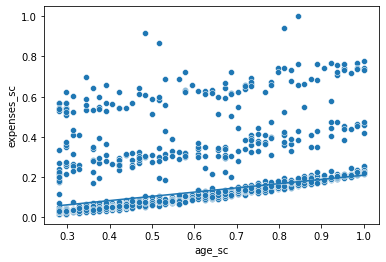

In [65]:
# AGE VS EXPENSES - TRAIN DATA

sns.scatterplot(train.age_sc,train.expenses_sc)

sns.lineplot(train.age_sc,0.21045374*train.age_sc)


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_sc', ylabel='expenses_sc'>

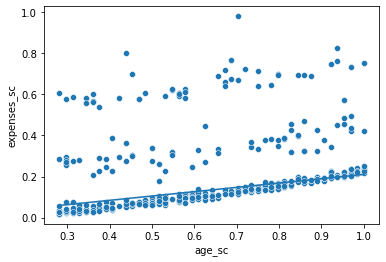

In [66]:
# AGE VS EXPENSES - TEST DATA

sns.scatterplot(test.age_sc,test.expenses_sc)

sns.lineplot(test.age_sc,0.21045374 * test.age_sc)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi_sc', ylabel='expenses_sc'>

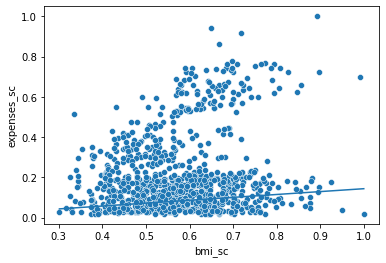

In [67]:

# BMI VS EXPENSES - TRAIN DATA

sns.scatterplot(train.bmi_sc,train.expenses_sc)

sns.lineplot(train.bmi_sc,0.14348869*train.bmi_sc)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi_sc', ylabel='expenses_sc'>

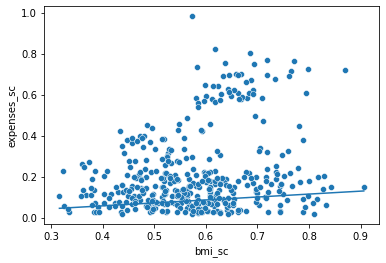

In [68]:
# BMI VS EXPENSES - TEST DATA

sns.scatterplot(test.bmi_sc,test.expenses_sc)

sns.lineplot(test.bmi_sc,0.14348869*test.bmi_sc)


# ----------------------------------------------------------------

# Model testing phase

In [53]:



predicted = RR.predict(test_X)
predicted



array([[0.15998794],
       [0.06793698],
       [0.19602643],
       [0.02276399],
       [0.18991247],
       [0.44142163],
       [0.193716  ],
       [0.47221195],
       [0.07950569],
       [0.52748562],
       [0.51982653],
       [0.21120647],
       [0.12681538],
       [0.42751251],
       [0.08592026],
       [0.20620772],
       [0.0873813 ],
       [0.5138222 ],
       [0.45572623],
       [0.23737638],
       [0.15340952],
       [0.55070005],
       [0.1833677 ],
       [0.17730113],
       [0.18031553],
       [0.14588678],
       [0.1899539 ],
       [0.10878109],
       [0.21907147],
       [0.09629523],
       [0.19294   ],
       [0.13427094],
       [0.07780983],
       [0.20130735],
       [0.16036679],
       [0.43446819],
       [0.52732025],
       [0.16981875],
       [0.17244494],
       [0.12206725],
       [0.13211693],
       [0.20524797],
       [0.09979856],
       [0.12904374],
       [0.56388921],
       [0.54148223],
       [0.15271074],
       [0.129

In [54]:

predictions = pd.DataFrame(predicted, columns=["expenses"])

predictions

,expenses
0,0.159988
1,0.067937
2,0.196026
3,0.022764
4,0.189912
...,...
397,0.168555
398,0.190839
399,0.148326
400,0.147934


# error = actual-predicted

In [55]:
Error = test_Y - RR.predict(test_X)

Error



,index,expenses_sc
0,1105.840012,-0.019042
1,1267.932063,-0.038449
2,286.803974,0.027528
3,231.977236,0.004330
4,848.810088,-0.023666
...,...,...
397,805.831445,0.277995
398,1072.809161,-0.001148
399,338.851674,-0.019228
400,539.852066,-0.050766


In [56]:
#error analysis

actuals.expenses_sc - predictions.expenses


0     -0.019042
1     -0.038449
2      0.027528
3      0.004330
4     -0.023666
         ...   
397    0.277995
398   -0.001148
399   -0.019228
400   -0.050766
401   -0.164809
Length: 402, dtype: float64

In [57]:

#ACTUAL vs PREDICTED values

pd.concat([pd.DataFrame(actuals["expenses_sc"]),predictions], axis=1)



,expenses_sc,expenses
0,0.140946,0.159988
1,0.029488,0.067937
2,0.223555,0.196026
3,0.027094,0.022764
4,0.166247,0.189912
...,...,...
397,0.446551,0.168555
398,0.189691,0.190839
399,0.129098,0.148326
400,0.097168,0.147934


# Test measurements

## error analysis

In [58]:



from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error




In [60]:
#MSE

mse= mean_squared_error(actuals.expenses_sc, predictions.expenses)


#RMSE

import math

rmse=math.sqrt(mse)

print(mse,"  ,  ",rmse)


0.008963112891738598   ,   0.09467371806229329


##  accuracy analysis

In [70]:
from sklearn.metrics import accuracy_score, r2_score

# lr.score(train, y~a+b)

# lr.score(train_X,train_Y)



#print(accuracy_score(actuals.expenses, predictions.expenses))

print("test accuracy is ", r2_score(actuals.expenses_sc, predictions.expenses))

#test accuracy



test accuracy is  0.7570640460224377


In [71]:
# train accuracy - 72.79

# test  accuracy -- 75.70


# Conclusion - 

### This  seems to be a good model per Train vs Test accuracy but still too high RMSE


# ------------------------------------------------------------------------------------------------------